In [11]:
import numpy as np
from matplotlib import pyplot as plt
import random

np.random.normal(1, 0.1, size=(10))
random.randint(0, 100)
max([0, 1, 2])
np.argmax([0, 4, 2])

1

In [22]:
class Team():
    
    def __init__(self, mu, sigma):
        self.mu = mu
        self.si = sigma
        self.pickMap = self.pickMap_teamBest # use a steragy
    
    def preparePool(self, poollen):
        self.poolMu, self.poolSi = np.random.normal(self.mu, self.si, size = (poollen)), np.abs(np.random.normal(2 * self.si, size = (poollen)))
        return self.poolMu, self.poolSi
    
    def pickMap_teamBest(self, picked):
        maxVal = 0
        maxIdx = 0
        for i in range(len(self.poolMu)):
            if self.poolMu[i] > maxVal and picked[i] == False:
                maxVal = self.poolMu[i]
                maxIdx = i
                
        return maxIdx
    
    def pickMap_random(self, picked):
        raise NotImplementedError
        
    def playMap(self, idx):
        return np.sum(np.random.normal(self.poolMu[idx], self.poolSi[idx], size = (2))) # 2v2

In [13]:
def match(teamA, teamB, scoreToWin = 7, poolsize = 16):
    
    teamA.preparePool(poolsize)
    teamB.preparePool(poolsize)
    
    team = [teamA, teamB]
    score = [0 for t in team]
    currmap = 0
    picked = [False for i in range(poolsize)]
    picked[-1] = True # TB cannot be picked
    
    # roll
    if random.randint(0, 100) > random.randint(0, 100):
        tid = 0
    else:
        tid = 1
        
    while max(score) < scoreToWin:
        # pick
        if min(score) < (scoreToWin - 1):
            currmap = team[tid].pickMap(picked)
            picked[currmap] = True
        # TB HYPE
        else:
            currmap = poolsize - 1
            
        # play the map
        teamScores = [t.playMap(currmap) for t in team]
        score[np.argmax(teamScores)] += 1
    
    return score

In [81]:
a = Team(10, 1)
b = Team(15, 5)

match(a, b)

[5, 7]

<BarContainer object of 7 artists>

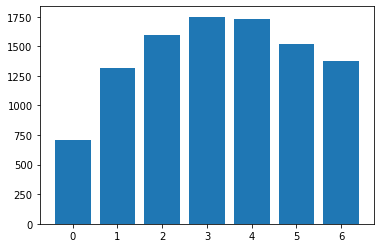

In [99]:
from tqdm.notebook import tqdm as tqdm

a = Team(10, 5)
b = Team(14, 3)
res = [0 for i in range(7)]

for i in tqdm(range(10000)):
    result = match(a, b)
    res[min(result)] += 1

plt.bar([i for i in range(7)], res)

<BarContainer object of 7 artists>

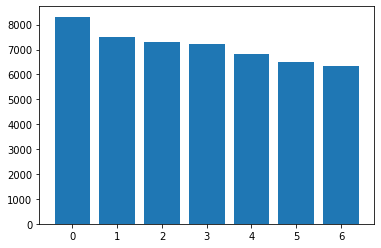

In [93]:
from tqdm.notebook import tqdm as tqdm

teamMu = 10
teamSi = 3
teamSiMu = 2
teamSiSi = 4

res = [0 for i in range(7)]

for i in tqdm(range(50000)):
    a = Team(np.random.normal(teamMu, teamSi), np.abs(np.random.normal(teamSiMu, teamSiSi)))
    b = Team(np.random.normal(teamMu, teamSi), np.abs(np.random.normal(teamSiMu, teamSiSi)))
    result = match(a, b)
    res[min(result)] += 1

plt.bar([i for i in range(7)], res)